# <center>Thank You!

In [40]:
# Brain Tumor MRI Classification using a Custom CNN (from scratch)

# =========================
# 1. Import Libraries
# =========================
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# =========================
# 2. Define Labels & Load Data
# =========================
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

X = []
y = []
image_size =224 #150

Xt = []
yt = []

# Training images
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri','Training',i)
    for j in tqdm(os.listdir(folderPath), desc=f"Loading Training {i}"):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X.append(img)
        y.append(i)



X = np.array(X)
y = np.array(y)

print("Dataset shape:", X.shape, y.shape)


# Testing images
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri','Testing',i)
    for j in tqdm(os.listdir(folderPath), desc=f"Loading Testing {i}"):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        Xt.append(img)
        yt.append(i)
a = np.array(Xt)
b = np.array(yt)

print("Dataset shape:", a.shape, b.shape)        

Loading Testing glioma_tumor:  14%|█▍        | 14/100 [00:00<00:00, 134.51it/s]

Dataset shape: (2870, 224, 224, 3) (2870,)


Loading Testing pituitary_tumor: 100%|██████████| 74/74 [00:00<00:00, 103.18it/s]

Dataset shape: (394, 224, 224, 3) (394,)


In [41]:
# =========================
# 3. Shuffle & Split Data
# =========================
X, y = shuffle(X, y, random_state=82)

# Encode labels into integers
y_encoded = [labels.index(i) for i in y]
y_encoded = tf.keras.utils.to_categorical(y_encoded, num_classes=len(labels))

# # Train/Test split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y_encoded, test_size=0.1, random_state=101
# )

# Normalize images
X_train = X/255.0
X_test = a/255.0



print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)


Train set: (2870, 224, 224, 3) (2583, 4)
Test set: (394, 224, 224, 3) (287, 4)


In [42]:

# =========================
# 4. Build Custom CNN Model
# =========================
model = Sequential([

    # Block 1
    Conv2D(32, (3,3), activation='relu', padding='same',
           input_shape=(image_size,image_size,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    # Dropout(0.25),

    # Block 2
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    # Dropout(0.25),

    # Block 3
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    # Dropout(0.25),

    # Block 4
    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    # Dropout(0.3),
    

    # Block 6
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    # Block 7
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
   
    # Dense layers
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    

    

    Dense(len(labels), activation='softmax')
])

model.summary()

# =========================
# 5. Compile Model
# =========================
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# =========================
# 6. Train Model
# =========================
history = model.fit(
     X, y_encoded,
    validation_split=0.1,
    epochs=50,
    batch_size=8,
    verbose=1
)



Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_90 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization_105 (Bat (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d_90 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
batch_normalization_106 (Bat (None, 112, 112, 64)      256       
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 56, 56, 128)     

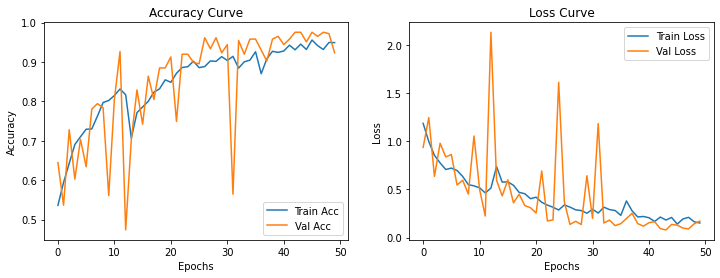

9/9 [==============================] - 2s 188ms/step - loss: 0.0422 - accuracy: 0.9826
Test Accuracy: 0.9825783967971802
Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.95      1.00      0.97        72
        no_tumor       1.00      0.97      0.99        38
meningioma_tumor       0.99      0.95      0.97        84
 pituitary_tumor       1.00      1.00      1.00        93

        accuracy                           0.98       287
       macro avg       0.98      0.98      0.98       287
    weighted avg       0.98      0.98      0.98       287



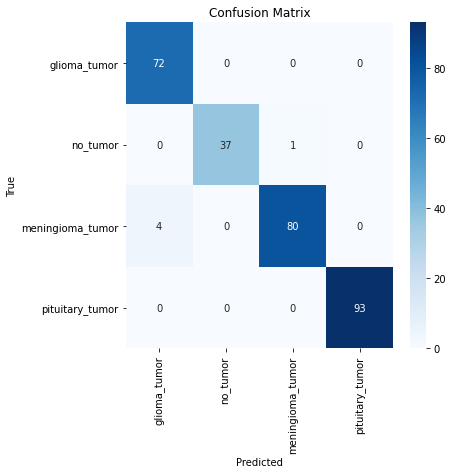

In [43]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.1, random_state=101
)


# =========================
# 7. Training Curves
# =========================
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")

plt.show()

# =========================
# 8. Evaluation
# =========================
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print("Test Accuracy:", test_acc)

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=labels))

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()